### 01. Import packages & data

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as rfc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/samsungData.txt',sep='|')

### 02.a. Base RF - with all variables

In [6]:
X = data[data.columns[:-2]]
Y = data.activity
randomState = 42

model0 = rfc(n_estimators=50,random_state=randomState,n_jobs=4,warm_start=True,oob_score=True)
model0 = model0.fit(X, Y)
model0.oob_score_

0.9787812840043526

#### plot top n

In [7]:
n= 25

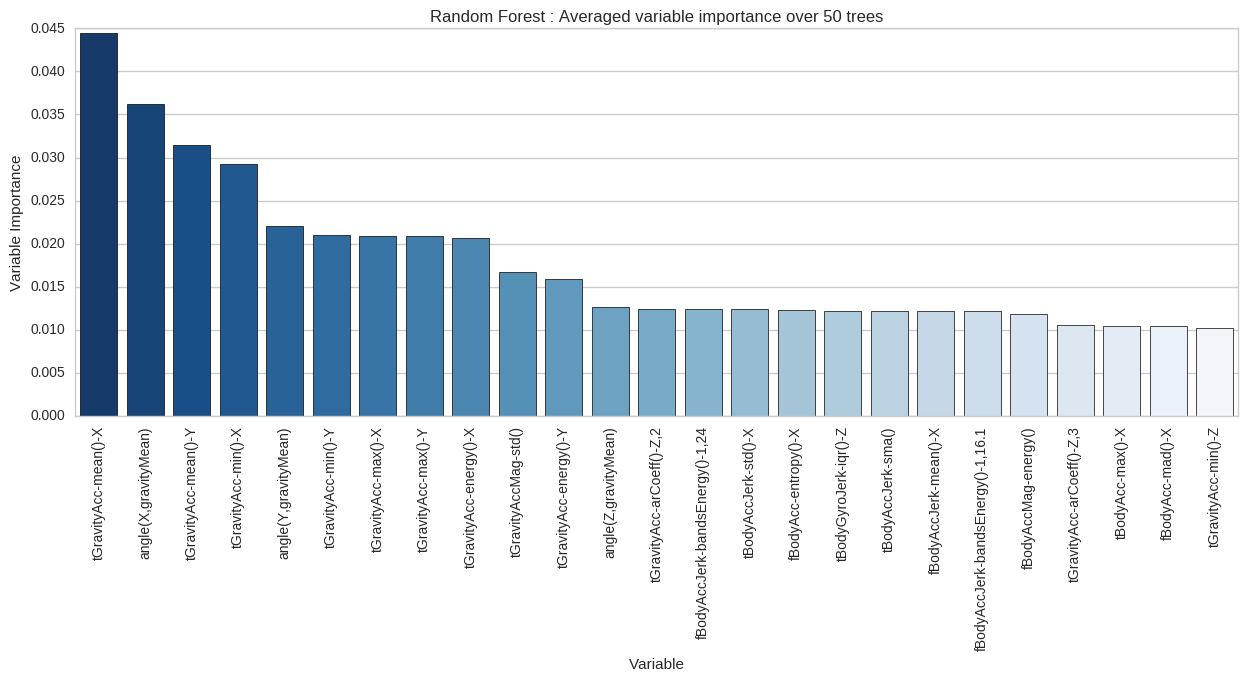

In [11]:
model_vars0 = pd.DataFrame(
             {'variable':X.columns,
              'importance':model0.feature_importances_})

model_vars0.sort_values(by='importance',ascending=False,inplace=True)

sns.plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

sns.barplot(y='importance',
            x='variable',
            data=model_vars0[:n],
            palette=sns.color_palette("Blues_r",
                                      n_colors=n),
            linewidth=0.5)
sns.plt.xticks(rotation=90)
sns.plt.xlabel('Variable')
sns.plt.ylabel('Variable Importance')
sns.plt.title('Random Forest : Averaged variable importance over 50 trees')

In [18]:
pca = PCA(n_components=data.shape[1]-2)

In [19]:
pca.fit(data.ix[:,:-2])

PCA(copy=True, n_components=561, whiten=False)

In [64]:
components = {'pc'+str(id):pca.explained_variance_ratio_[id] for id in range(data.shape[1]-2)}

In [83]:
principle_components = pd.DataFrame.from_dict(components,orient='index')
principle_components.columns=['varExplained']
principle_components.sort_values(by='varExplained',ascending=False,inplace=True)

In [101]:
principle_components[(principle_components.cumsum()<0.75).values].shape

(4, 1)